In [112]:
import pandas as pd
import numpy as np

In [113]:
data = pd.read_csv('./BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [118]:
Y_test_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score (for Test) = ", accuracy_score(Y_test,Y_test_pred))
print("Accuracy score (for Train) = ",accuracy_score(Y_train,Y_train_pred))

Accuracy_score (for Test) =  0.9927184466019418
Accuracy score (for Train) =  0.5114583333333333


### We have to use DT for visualizing the tree, because RF is set of trees and hence can't be visualized

In [119]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Hyperparameter tuning

In [120]:
#!pip install pydotplus
#!pip install graphviz
#!pip install opencv-python

In [121]:
### Let's generate the tree
from graphviz import Source
from IPython.display import display
from sklearn.tree import export_graphviz
export_graphviz(dtree,'tree.dot',feature_names=X_train.columns)


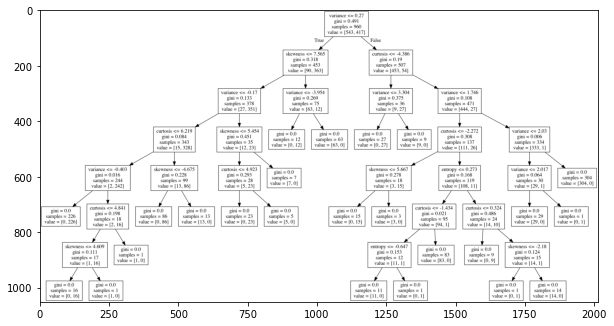

In [122]:
### Let's visualize the tree:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(img)

#### Looking at the tree above, we can say that the depth of the tree can be 4-5 rather than reaching till leaf node.

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
RandomForestClassifier()

n_estimators = [int(i) for i in np.linspace(100,1200,12)]

max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split = [int(x) for x in np.linspace(1,30,5)]

min_samples_leaf = [1,3,5,7,9,11,13,15]

params = {
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "max_features":['auto','sqrt']
}

random_HP=RandomizedSearchCV(classifier,param_distributions=params,cv=5,verbose=2)

In [125]:
random_HP.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=600, min_samples_split=22, min_samples_leaf=9, max_features=auto, max_depth=20 
[CV]  n_estimators=600, min_samples_split=22, min_samples_leaf=9, max_features=auto, max_depth=20, total=   0.8s
[CV] n_estimators=600, min_samples_split=22

/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/paralle

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30 


/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/paralle

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30 


/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/paralle

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30 


/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/paralle

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30 


/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/envs/Live_Projects/lib/python3.6/site-packages/joblib/paralle

[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=11, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=200, min_samples_split=30, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.3s
[CV] n_estimators=200, min_samples_split=3

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   30.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [1, 8, 15, 22, 30],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [126]:
random_HP.best_params_

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [127]:
random_HP.best_score_

0.9864583333333334

In [132]:
classifier_tuned = RandomForestClassifier(n_estimators=400,min_samples_split=8,min_samples_leaf=1,max_features='auto',max_depth=25)
classifier_tuned.fit(X_train,Y_train)

RandomForestClassifier(max_depth=25, min_samples_split=8, n_estimators=400)

In [133]:
Y_test_pred_tune = classifier_tuned.predict(X_test)
Y_train_pred_tune = classifier_tuned.predict(X_train)

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_test_pred_tune)

0.9927184466019418

In [135]:
accuracy_score(Y_train,Y_train_pred_tune)

1.0

In [138]:
import pickle

file = 'Bank_Note_Auth_Model_class.pkl'
pickle.dump(classifier_tuned,open(file,'wb'))